## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Пропущенных значений нет.

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Категориальных значений нет.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
X_train_scaled = StandardScaler().fit_transform(X_train[['alcohol', 'magnesium']])
X_test_scaled = StandardScaler().fit_transform(X_test[['alcohol', 'magnesium']])

In [8]:
neighbors = [1, 3, 5, 10, 15, 25]
models = []
for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    models.append(clf.fit(X_train_scaled, y_train))
results = {}
for i in range(len(models)):
    pred_train = models[i].predict(X_train_scaled)
    pred_test = models[i].predict(X_test_scaled)
    results[neighbors[i]] = [round(np.mean(pred_train==y_train), 2), round(np.mean(pred_test==y_test), 2)]

In [9]:
pd.DataFrame.from_dict(results, orient='index', columns=['Train', 'Test'])

,Train,Test
1,1.00,0.56
3,0.83,0.61
5,0.81,0.63
10,0.79,0.54
15,0.74,0.57
25,0.76,0.56


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [25]:
#!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [10]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

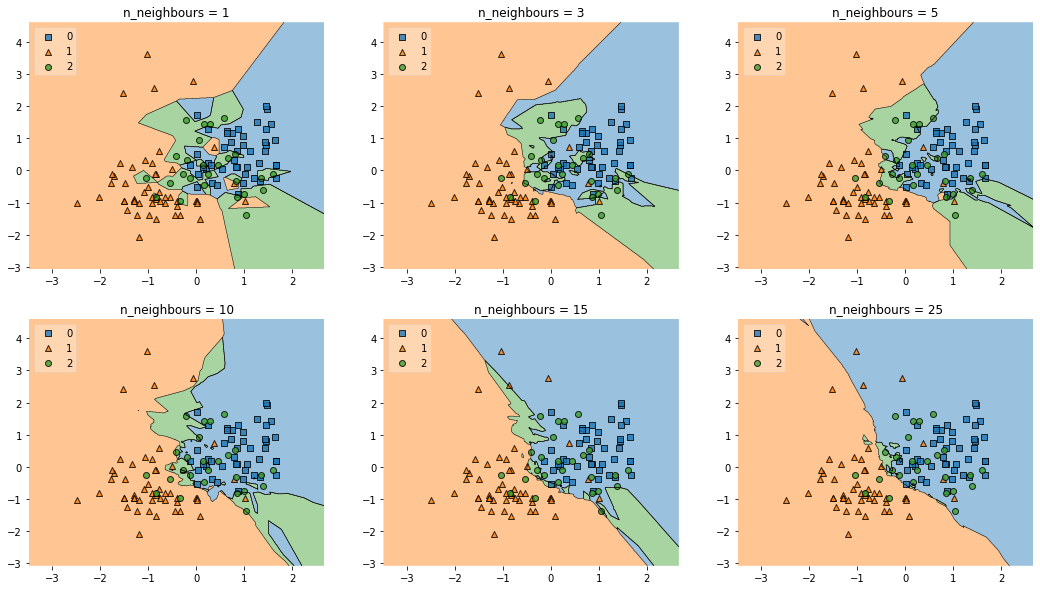

In [11]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(18,10))

for clf, grd, k in zip(models,
                        itertools.product([0, 1], [0, 1, 2]),
                      neighbors):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2)
    plt.title('n_neighbours = {}'.format(k))

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Исходя из результатов 1.3, модель показала наилучшие результаты на тестовой выборке при **k = 5**.
Не так просто оценить оптимальное k по графикам из-за особенностей геометрии данных: 2 класс довольно сильно пересакется с 0 классом, из-за этого не избежать "островных" зеленых участков. При этом синий класс сконцентрирован в центрально-правой части графика, а разброс зеленого класса больше, поэтому, наиболее удобной решающая поверхность будет выглядеть также при **k = 5**.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

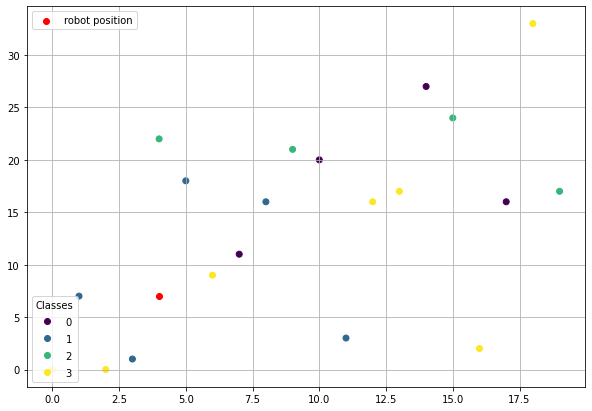

In [12]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(k).fit(landmarks.T[1].reshape(-1, 1), classes.reshape(-1, 1))
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        rasst = np.array([np.sqrt(self.trajectory[-1][0]**2 + self.trajectory[-1][1]**2)]) # Считаем Евклидово расстояние новой позиции
        klass = 0 + np.random.binomial(1, 0.8) * self.knn.predict(rasst.reshape(-1, 1))[0] # Предсказываем класс
        new_position = np.array([self.trajectory[-1] + self.mapping[klass]]) # Вычисляем новую позицию
        self.trajectory = np.vstack((self.trajectory, new_position)) # Добавляем в историю траектории

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [20]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

<ipython-input-19-c6566b9b2ca7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.knn = KNeighborsClassifier(k).fit(landmarks.T[1].reshape(-1, 1), classes.reshape(-1, 1))


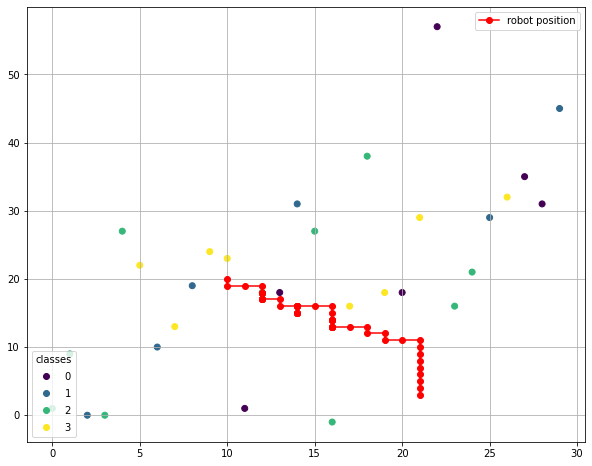

In [21]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

<ipython-input-19-c6566b9b2ca7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.knn = KNeighborsClassifier(k).fit(landmarks.T[1].reshape(-1, 1), classes.reshape(-1, 1))
<ipython-input-19-c6566b9b2ca7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.knn = KNeighborsClassifier(k).fit(landmarks.T[1].reshape(-1, 1), classes.reshape(-1, 1))
<ipython-input-19-c6566b9b2ca7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.knn = KNeighborsClassifier(k).fit(landmarks.T[1].reshape(-1, 1), classes.reshape(-1, 1))
<ipython-input-19-c6566b9b2ca7>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

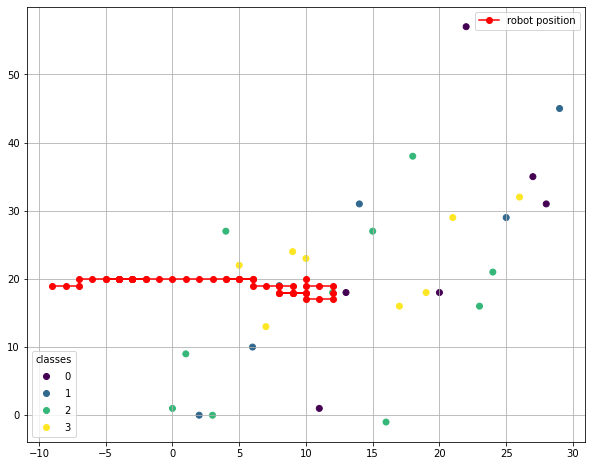

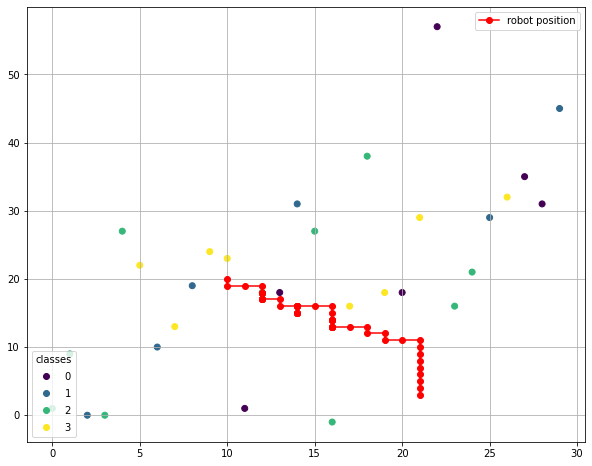

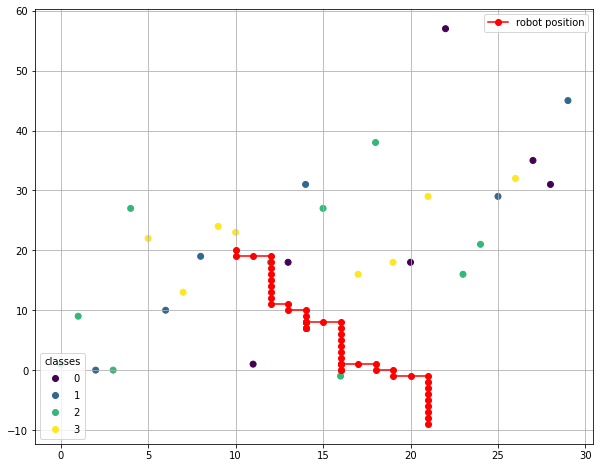

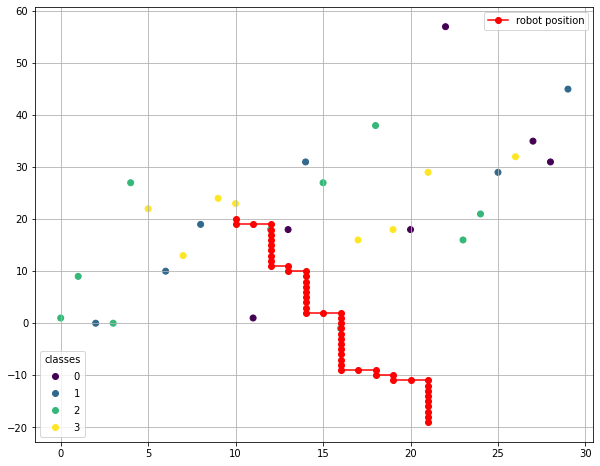

In [22]:
for k in [3, 5, 10, 15]:
    conduct_experiment(x, mean = 3, std = 10, k = k, n_movements = 50)

С увеличением числа соседей траектория становится все более и более вертикальной. Это связано с тем, что точек 3 класса оказалось больше в выборке. Вероятно, с осмыленным назначением точек, плоскость можно было бы разделить на 4 группы, попадая в часть плоскости каждой группы, робот двигался бы только в одной траектории с вероятностью 0.8, пока не попал бы в другую группу.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [23]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [24]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных значений нет.

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [25]:
# Первый столбец не несет никакой информации, влияющей на цену
data = data.drop('Unnamed: 0', axis=1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [27]:
import seaborn as sns

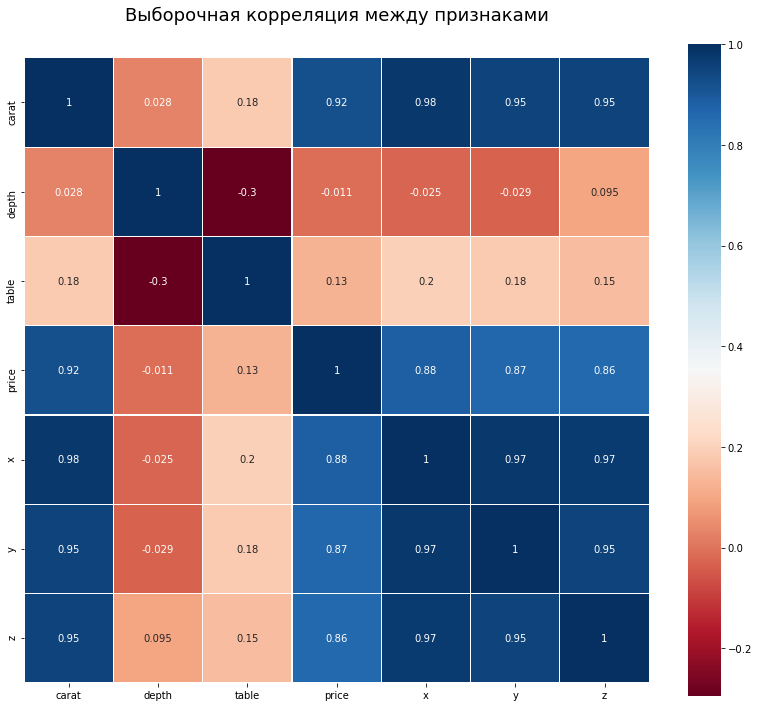

In [28]:
NumericData = data.select_dtypes(include = ['float64', 'int64'])
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Выборочная корреляция между признаками', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

Больше всего с переменной **price** коррелирует признак 'carat', 'x', 'y', 'z'.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [29]:
data = data.join(pd.get_dummies(data[['cut', 'color', 'clarity']], drop_first=True), how='right')
data = data.drop(['cut', 'color', 'clarity'], axis=1, inplace=False)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [30]:
from sklearn.model_selection import train_test_split
y = data['price']
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [31]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression().fit(X_train_scaled,y_train)
print ("Ошибка на тренировочной выборке: {}".format(mean_squared_error(y_train, linreg.predict(X_train_scaled))))
print ("Ошибка на тестовой выборке: {}".format(mean_squared_error(y_test, linreg.predict(X_test_scaled))))

Ошибка на тренировочной выборке: 1270791.8536412274
Ошибка на тестовой выборке: 1293193.1364468855


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [33]:
list(zip(X_train.columns, linreg.coef_))

[('carat', 5307.717343243687),
 ('depth', -90.90930188898413),
 ('table', -63.02274459094855),
 ('x', -1089.7564863745617),
 ('y', 0.3465732995724509),
 ('z', -40.2044976248448),
 ('cut_Good', 177.31209372279318),
 ('cut_Ideal', 420.7650291336144),
 ('cut_Premium', 344.49078762148935),
 ('cut_Very Good', 311.9807565867912),
 ('color_E', -87.94143338080941),
 ('color_F', -105.97674113914701),
 ('color_G', -204.56720041218674),
 ('color_H', -353.4123308612134),
 ('color_I', -452.1279486647694),
 ('color_J', -525.7583036519053),
 ('clarity_IF', 959.2204016969547),
 ('clarity_SI1', 1592.5252264064068),
 ('clarity_SI2', 1038.7616862003465),
 ('clarity_VS1', 1659.3627194085384),
 ('clarity_VS2', 1814.4734181773429),
 ('clarity_VVS1', 1280.1965332235566),
 ('clarity_VVS2', 1456.147657740634)]

Наиболее высокие по модулю коэффициенты получают признаки 'carat', 'clarity_VS2', 'clarity_VS1', 'clarity_SI1'.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
from sklearn.linear_model import Ridge, Lasso

In [35]:
lasso = Lasso(10).fit(X_train_scaled, y_train)
list(zip(X_train.columns, lasso.coef_))

[('carat', 4825.59188871903),
 ('depth', -100.04581389675155),
 ('table', -73.61293405457117),
 ('x', -659.9764272159548),
 ('y', -0.0),
 ('z', -33.74813227687833),
 ('cut_Good', 48.46680583363916),
 ('cut_Ideal', 207.41663424544026),
 ('cut_Premium', 152.7736491530897),
 ('cut_Very Good', 136.2378795019994),
 ('color_E', -17.843770805817613),
 ('color_F', -39.293852650640396),
 ('color_G', -126.93390085125088),
 ('color_H', -280.7059518757572),
 ('color_I', -379.28446823932705),
 ('color_J', -465.59280137618634),
 ('clarity_IF', 645.5805766022548),
 ('clarity_SI1', 859.3353138532541),
 ('clarity_SI2', 402.43232464978223),
 ('clarity_VS1', 1038.7819954267836),
 ('clarity_VS2', 1096.742827639701),
 ('clarity_VVS1', 845.6560595838723),
 ('clarity_VVS2', 955.7934595653202)]

In [36]:
ridge = Ridge(10).fit(X_train_scaled, y_train)
list(zip(X_train.columns, ridge.coef_))

[('carat', 5270.623943279384),
 ('depth', -89.29495077250685),
 ('table', -63.214764529964626),
 ('x', -1049.4596014241502),
 ('y', -1.6964059877526674),
 ('z', -43.54316815254085),
 ('cut_Good', 177.60675276494896),
 ('cut_Ideal', 421.4148739399196),
 ('cut_Premium', 345.1351061407778),
 ('cut_Very Good', 312.9102401981156),
 ('color_E', -87.52546738677091),
 ('color_F', -105.75474552020063),
 ('color_G', -203.96780068651233),
 ('color_H', -352.51130130005635),
 ('color_I', -450.7844381455362),
 ('color_J', -524.4342723938693),
 ('clarity_IF', 946.8535645362053),
 ('clarity_SI1', 1562.2170474457073),
 ('clarity_SI2', 1012.9359056406071),
 ('clarity_VS1', 1634.030880951696),
 ('clarity_VS2', 1784.95244072921),
 ('clarity_VVS1', 1262.828386821313),
 ('clarity_VVS2', 1435.8892764218026)]

Веса довольно сильно уменьшились в регрессии с Lasso-регуляризацией и намного менее сильно в регрессии с Ridge-регуляризацией.
Мультиколлинеарность проявлялась в изначальной регрессии, так как оценки коэффициентов оказались не сильно усточивыми. И оценки уменьшились одновременно у нескольких параметров.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [37]:
alphas = [0.1, 1, 10, 100, 200]
results = []
for a in alphas:
    lasso_coef = Lasso(a).fit(X_train, y_train).coef_
    ridge_coef = Ridge(a).fit(X_train, y_train).coef_
    results.append({'alpha': a,
                   'lasso_norm': np.linalg.norm(lasso_coef),
                   'ridge_norm': np.linalg.norm(ridge_coef)})

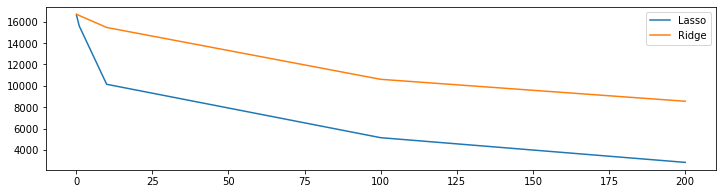

In [38]:
plt.figure(figsize=(12,3))
plt.plot([res['alpha'] for res in results], [res['lasso_norm'] for res in results], label='Lasso')
plt.plot([res['alpha'] for res in results], [res['ridge_norm'] for res in results], label='Ridge')
plt.legend()
plt.show()

Метод Lasso намного агрессивнее уменьшает веса.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [39]:
from sklearn.linear_model import LassoCV

In [40]:
model = LassoCV()
model.set_params(alphas=[0.1, 1, 10, 100, 200], cv=5)
model.fit(X_train, y_train)
model.alphas_

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2807915705.098213, tolerance: 47919147.97014151
  model = cd_fast.enet_coordinate_descent_gram(


array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [41]:
np.mean(model.mse_path_, axis=1)

array([4283768.99769859, 2583380.2169491 , 1523381.43504847,
       1279938.81875409, 1288026.54578189])

Минимальный MSE достигается при alpha = 1.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [42]:
lasso = Lasso(1).fit(X_train_scaled, y_train)
list(zip(X_train.columns, lasso.coef_))

[('carat', 5259.479121300422),
 ('depth', -91.83608231701997),
 ('table', -64.07922474283981),
 ('x', -1046.5647112606207),
 ('y', -0.0),
 ('z', -39.46981302111925),
 ('cut_Good', 164.53214540652775),
 ('cut_Ideal', 399.6183469832968),
 ('cut_Premium', 325.47709293927056),
 ('cut_Very Good', 294.56635348821186),
 ('color_E', -80.93528979704779),
 ('color_F', -99.31111561208782),
 ('color_G', -196.80425334033814),
 ('color_H', -346.1431563679336),
 ('color_I', -444.8414608421363),
 ('color_J', -519.7373108724677),
 ('clarity_IF', 927.4754658101383),
 ('clarity_SI1', 1518.3127812398563),
 ('clarity_SI2', 974.3555957318235),
 ('clarity_VS1', 1596.5615460588094),
 ('clarity_VS2', 1741.8358265378133),
 ('clarity_VVS1', 1236.221312210585),
 ('clarity_VVS2', 1405.5147508364676)]

Информативными остались 'carat', 'x', и различные значения 'clarity'. Факторы 'color_E', 'color_F', 'y', 'z' остались неинформативными. Логично, что карат, и длина алмаза, чистота будут сильно влиять на ценность драгоценного камня. На цену не сильно влияет хороший цвет, но плохие цвета довольно сильно отрицательно влияют на стоимость.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [43]:
print ("Ошибка Lasso-регрессии: {}".format(mean_squared_error(y_test, lasso.predict(X_test_scaled))))
print ("Ошибка простой линейной регрессии: {}".format(mean_squared_error(y_test, linreg.predict(X_test_scaled))))

Ошибка Lasso-регрессии: 1292744.1810895004
Ошибка простой линейной регрессии: 1293193.1364468855


Незначительно, но все же лучше оказалась модель Lasso, потому что она позволила более точно оценить влияние характеристик на целевую переменную благодаря штрафу за большие веса.